<a href="https://colab.research.google.com/github/KendallScott/BTT/blob/master/Archive/Data_API_Loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://geemap.org/notebooks/114_dynamic_world/


# Imports and Setup

In [1]:
!pip -q install --upgrade folium
!pip -q install geopandas
!pip -q install geojson
!pip -q install eeconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.9 MB/s eta 0:00:00


In [2]:
# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

package not found, installing w/ pip in Google Colab...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.2 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11124 sha256=28c42bbde96f363b

In [3]:
pip install eemont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eemont: filename=eemont-0.3.6-py3-none-any.whl size=135743 sha256=acd6b51f3dd7902f6f4e868ed49cb0cab93e21c52c3dc2f99ec049ea9dcc9698
  Stored in directory: /root/.cache/pip/wheels/c2/79/2c/4fed17c3d3b466bbf4fe5872eec11f189147043b01152a4f75
  Created wheel for ee_extra: filename=ee_extra-0.0.15-py3-none-any.whl size=236757 sha256=832b2e2f4df0c68d5a3427292b1a7487f2d8ef8a78d8100e79fccc882ae0d84d
  Stored in directory: /root/.cache/pip/wheels/29/96/0e/4e36b0dfd85e16867723df739294c0aa45a65b191adac4d959
Successfully built eemont ee_extra


In [4]:
# Standard imports
import requests
import json

import pandas as pd
import numpy as np
from PIL import Image

# Geospatial processing packages
import geopandas as gpd
import geojson

import shapely
from shapely.geometry import box

# Mapping and plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import ee
import eeconvert as eec
import geemap
import folium
import eemont

import geopandas as gpd
from shapely.geometry import shape

### Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Authenticate Google Earth Engine
Make sure you have signed up for access to Google Earth Engine at https://signup.earthengine.google.com/#!/. Once your request has been approved, you should be able to access Google Earth Engine at https://code.earthengine.google.com/.

In [6]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=W8rmSOcekdprqenZgnvPT3Uja5ZhYNgCvJTNChZaSIs&tc=cevHxWVElL6M6h_mqB_9bEs0pi9MiIpx5-dfmLHN1js&cc=dh7n8XUZhCSm8Ksfpg-_Y3A5jiHYCyGlUBai6FfA91k

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AZEOvhWZ9uEqbzESvgVqy8hXus8xbX796fp-_YOIg1lGcBlyuq8zvSQyUsQ

Successfully saved authorization token.


In [19]:
# Read the GeoJSON file
mines = gpd.read_file('/content/drive/MyDrive/KY_Released_mines.geojson')

# Read data using GeoPandas
print("Data dimensions: {}".format(mines.shape))
mines = mines.head(20)

Data dimensions: (12606, 19)


In [20]:
# Get the shape geometry
region = eec.gdfToFc(mines)

In [21]:
df = pd.DataFrame()

In [22]:
mines_exploded= mines.explode()
mines_exploded

id  ACT_INAC  Calc_Acres                      Contact  \
0  0  00000000000000001111  Released  294.302954  KY Division of Mine Permits   
1  0  00000000000000001112  Released  305.739886  KY Division of Mine Permits   
   1  00000000000000001112  Released  305.739886  KY Division of Mine Permits   
   2  00000000000000001112  Released  305.739886  KY Division of Mine Permits   
   3  00000000000000001112  Released  305.739886  KY Division of Mine Permits   
2  0  00000000000000001f4d  Released    4.822285  KY Division of Mine Permits   
3  0  00000000000000002b96  Released    6.335894  KY Division of Mine Permits   
4  0  00000000000000001d20  Released    2.864151  KY Division of Mine Permits   
5  0  000000000000000020c7  Released    2.799211  KY Division of Mine Permits   
   1  000000000000000020c7  Released    2.799211  KY Division of Mine Permits   
6  0  00000000000000003095  Released   38.458558  KY Division of Mine Permits   
   1  00000000000000003095  Released   38.458558  KY Division of Mine Permits   
7  0  0000000000000000080c  Released    2.140314  KY Division of Mine Permits   
8  0  0000000000000000086a  Released   65.428833  KY Division of Mine Permits   
9  0  000000000000000008a4  Released   86.624399  KY Division of Mine Permits   
10 0  000000000000000008bf  Released    9.394097  KY Division of Mine Permits   
11 0  00000000000000000f90  Released    2.635152  KY Division of Mine Permits   
12 0  00000000000000000fd6  Released    0.462351  KY Division of Mine Permits   
13 0  0000000000000000201c  Released   36.476694  KY Division of Mine Permits   
   1  0000000000000000201c  Released   36.476694  KY Division of Mine Permits   
   2  0000000000000000201c  Released   36.476694  KY Division of Mine Permits   
14 0  000000000000000003af  Released   10.959218  KY Division of Mine Permits   
15 0  000000000000000014f0  Released   27.882968  KY Division of Mine Permits   
   1  000000000000000014f0  Released   27.882968  KY Division of Mine Permits   
16 0  000000000000000014fc  Released    2.139254  KY Division of Mine Permits   
   1  000000000000000014fc  Released    2.139254  KY Division of Mine Permits   
17 0  00000000000000002811  Released    3.756246  KY Division of Mine Permits   
   1  00000000000000002811  Released    3.756246  KY Division of Mine Permits   
   2  00000000000000002811  Released    3.756246  KY Division of Mine Permits   
18 0  00000000000000002821  Released   78.265871  KY Division of Mine Permits   
   1  00000000000000002821  Released   78.265871  KY Division of Mine Permits   
   2  00000000000000002821  Released   78.265871  KY Division of Mine Permits   
   3  00000000000000002821  Released   78.265871  KY Division of Mine Permits   
   4  00000000000000002821  Released   78.265871  KY Division of Mine Permits   
19 0  0000000000000000283f  Released   49.520246  KY Division of Mine Permits   
   1  0000000000000000283f  Released   49.520246  KY Division of Mine Permits   
   2  0000000000000000283f  Released   49.520246  KY Division of Mine Permits   
   3  0000000000000000283f  Released   49.520246  KY Division of Mine Permits   

           DATE_ISS FeatCLS MINE_STATU National_I ORIG_PERM  \
0  0  1141718400000      SF         FF  KY8640180   8640180   
1  0  1141718400000      SF         FF  KY8640180   8640180   
   1  1141718400000      SF         FF  KY8640180   8640180   
   2  1141718400000      SF         FF  KY8640180   8640180   
   3  1141718400000      SF         FF  KY8640180   8640180   
2  0   374486400000      SF         FF  KY0130119   0130119   
3  0   322732800000      SF         FF  KY1005000   1005000   
4  0   455871600000      SF         FF  KY9180010   9180010   
5  0   388137600000      SF         FF  KY0320080   0320080   
   1   388137600000      SF         FF  KY0320080   0320080   
6  0   172738800000      SF         FF  KY404774X   404774X   
   1   172738800000      SF         FF  KY404774X   404774X   
7  0   463302000000      SF         FF  KY826

In [23]:
# Get the shape geometry
region = eec.gdfToFc(mines_exploded)

In [35]:
coordinates = polygon.exterior.coords[:]

coordinates

[(-82.96437716155548, 38.04584886989064),
 (-82.96352367038013, 38.04522460244819),
 (-82.96239624780156, 38.04406595580033),
 (-82.96308920928983, 38.043245648902335),
 (-82.96355066003291, 38.04256298502656),
 (-82.9637249850331, 38.041842223089446),
 (-82.96294966595246, 38.041099032856934),
 (-82.96233316144858, 38.040046454743674),
 (-82.96014544709729, 38.04074637087007),
 (-82.95964549579014, 38.040501886016315),
 (-82.9586079248194, 38.04071005274864),
 (-82.95859274713668, 38.04111239083576),
 (-82.95898433023955, 38.04152882565142),
 (-82.95940979377598, 38.041798411811314),
 (-82.9595973381547, 38.04177598907729),
 (-82.95977282211261, 38.04192333168006),
 (-82.95943621082031, 38.042148041613466),
 (-82.9591423411196, 38.043035965722524),
 (-82.95875518918223, 38.04265097816294),
 (-82.95876618272044, 38.04236039591928),
 (-82.95849749684307, 38.04183499570888),
 (-82.9581794205818, 38.041420316620744),
 (-82.95773975578334, 38.041526203478846),
 (-82.95763104925847, 38.0414

In [39]:
polygon = ee.Geometry.MultiPolygon(coordinates)

In [43]:
polygon = mines['geometry'].values[i]
polygon.exterior.coords[:]

AttributeError: ignored

In [62]:
#https://stackoverflow.com/questions/55659835/trying-to-separate-polygon-data-into-x-and-y-coordinates-but-get-error-multip

import geopandas as gpd
from shapely.geometry import Polygon, LineString, MultiLineString

def getPolyCoords(row, geom, coord_type):
    """
    Returns the coordinates ('x|y') of edges/vertices of a Polygon/others
    Args:
    - row: the row object from a geodataframe; i.e.   df.loc[1]
    - geom: the name of "geometry" column, usually "geometry"
    - coord_type: 'x', or 'y'
    ...
    Valid geometrie types 'Polygon', 'Point', 'LineString', 'MultiLineString', 'MultiPolygon'
    """

    # Parse the geometries and grab the coordinate
    geometry = row[geom]
    #print(geometry.type)

    if geometry.type=='Polygon':
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            # Interior is more complex: xxx.interiors[0].coords.xy[0]
            return list( geometry.exterior.coords.xy[0] )
        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return list( geometry.exterior.coords.xy[1] )

    if geometry.type in ['Point', 'LineString']:
        if coord_type == 'x':
            return list( geometry.xy[0] )
        elif coord_type == 'y':
            return list( geometry.xy[1] )

    if geometry.type=='MultiLineString':
        all_xy = []
        # updated code, using .geoms
        for ea in geometry.geoms:
         all_xy = []

In [71]:
shape = mines['geometry'].values[i]

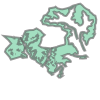

In [72]:
shape

In [81]:
from functools import singledispatch
from itertools import chain
from typing import (List,
                    Tuple,
                    TypeVar)

from shapely.geometry import (GeometryCollection,
                              LinearRing,
                              LineString,
                              Point,
                              Polygon)
from shapely.geometry.base import (BaseGeometry,
                                   BaseMultipartGeometry)

Geometry = TypeVar('Geometry', bound=BaseGeometry)


@singledispatch
def to_coords(geometry: Geometry) -> List[Tuple[float, float]]:
    """Returns a list of unique vertices of a given geometry object."""
    raise NotImplementedError(f"Unsupported Geometry {type(geometry)}")


@to_coords.register
def _(geometry: Point):
    return [(geometry.x, geometry.y)]


@to_coords.register
def _(geometry: LineString):
    return list(geometry.coords)


@to_coords.register
def _(geometry: LinearRing):
    return list(geometry.coords[:-1])


@to_coords.register
def _(geometry: BaseMultipartGeometry):
    return list(set(chain.from_iterable(map(to_coords, geometry))))


@to_coords.register
def _(geometry: Polygon):
    return to_coords(GeometryCollection([geometry.exterior, *geometry.interiors]))

In [86]:
import shapely as sh

def get_coords_from_polygon(shape):
    coords = set()

    if isinstance(shape, sh.geometry.Polygon):
        coords.update(shape.exterior.coords[:-1])
        for linearring in shape.interiors:
            coords.update(linearring.coords[:-1])
    elif isinstance(shape, sh.geometry.MultiPolygon):
        for polygon in shape:
            coords.update(get_coords_from_polygon(polygon))

    return coords

In [92]:
mines_geometry = mines_exploded['geometry'].values[i]

In [93]:
from shapely.geometry import Polygon
poly = Polygon(zip(mines_geometry))

TypeError: ignored

In [114]:
# prompt: get coordinates fro mines_exploded['geometry'].values[i] where it is multipolygon

def get_coords_from_polygon(shape):
    coords = set()

    if isinstance(shape, sh.geometry.Polygon):
        coords.update(shape.exterior.coords[:-1])
        for linearring in shape.interiors:
            coords.update(linearring.coords[:-1])
    elif isinstance(shape, sh.geometry.MultiPolygon):
        for polygon in shape:
            coords.update(get_coords_from_polygon(polygon))

    return coords

mines_geometry = mines_exploded['geometry'].values[i]
coords = get_coords_from_polygon(mines_geometry)


In [125]:
# prompt: set' object is not subscriptable

coords = list(coordinates)

In [126]:
coords

[(-82.94854657434215, 38.04761727979136),
 (-82.95281266892651, 38.04314557734236),
 (-82.95927984145438, 38.04717807159404),
 (-82.94604519418084, 38.04703431400359),
 (-82.94290922765595, 38.050490097702784),
 (-82.95306800395205, 38.039245445420725),
 (-82.9452467742237, 38.044818389278554),
 (-82.94595936244473, 38.04929185527709),
 (-82.9428675406892, 38.04965238414433),
 (-82.94525727765239, 38.05138715216895),
 (-82.95471674550055, 38.04889115518665),
 (-82.9541596485612, 38.051048100042564),
 (-82.9591423411196, 38.043035965722524),
 (-82.95940979377598, 38.041798411811314),
 (-82.95583502758947, 38.04356620564246),
 (-82.94579196562286, 38.044021476107865),
 (-82.94679330414493, 38.041790136258626),
 (-82.95029036226313, 38.04117961647525),
 (-82.94641338317017, 38.04881045196179),
 (-82.95014340731355, 38.04400845291507),
 (-82.95185868197247, 38.049056123244696),
 (-82.95050312225835, 38.03944859803892),
 (-82.95171837655013, 38.05081566942556),
 (-82.94520459637619, 38.0527

In [119]:
coordinates

{(-82.96437716155548, 38.04584886989064),
 (-82.9637249850331, 38.041842223089446),
 (-82.96355066003291, 38.04256298502656),
 (-82.96352367038013, 38.04522460244819),
 (-82.96308920928983, 38.043245648902335),
 (-82.96294966595246, 38.041099032856934),
 (-82.96239624780156, 38.04406595580033),
 (-82.96233316144858, 38.040046454743674),
 (-82.96091817374047, 38.04544945873806),
 (-82.96014544709729, 38.04074637087007),
 (-82.95982253838093, 38.04539664837138),
 (-82.95977282211261, 38.04192333168006),
 (-82.95964549579014, 38.040501886016315),
 (-82.9595973381547, 38.04177598907729),
 (-82.95943621082031, 38.042148041613466),
 (-82.95940979377598, 38.041798411811314),
 (-82.95927984145438, 38.04717807159404),
 (-82.9591423411196, 38.043035965722524),
 (-82.95898433023955, 38.04152882565142),
 (-82.95876618272044, 38.04236039591928),
 (-82.95875518918223, 38.04265097816294),
 (-82.9586079248194, 38.04071005274864),
 (-82.95859274713668, 38.04111239083576),
 (-82.95849749684307, 38.04183

In [ ]:
i=0

# Initial date of interest (inclusive).
i_date = '2021-01-01'
# Final date of interest (exclusive).
f_date = '2021-01-15'

df_contructor = []
while i<=len(mines_exploded):
        # Get dynamic world image collection by asset ID
        dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterBounds(region).filterDate(i_date, f_date)

        # get band names, equal to column names
        bandnames = dc.first().bandNames().getInfo()[:-1]

        mines_geometry = mines['geometry'].values[i]
        # Extract the coordinates from the polygon
        coordinates = get_coords_from_polygon(shape)

        # Create an ee.Geometry object from the coordinates
        polygon = ee.Geometry.Polygon(list(coordinates))

        # Set the maxError parameter
        max_error = 1  # Specify your desired maxError value

        # Project the geometry coordinates
        projected_polygon = polygon.transform('EPSG:4326', max_error)

        #decrease scale to get more rows of data/granularity
        ac = dc.getRegion(projected_polygon, scale=100 ).getInfo()
        df_constructor =pd.DataFrame(ac)

        df_constructor.columns = df_constructor.iloc[0]
        df_constructor = df_constructor.tail(-1)
        df_constructor['id'] = mines_exploded['id'].values[i]
        df = df.append(df_constructor)

        print(mines_exploded['Contact'].values[i])
        i+=1



KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits
KY Division of Mine Permits


In [28]:
df

""


In [ ]:
len(df['company'].unique())

In [ ]:
len(mines['company'].unique())

In [ ]:
from google.colab import files
df.to_csv('Kentucky_mines.csv', encoding = 'utf-8-sig')
files.download('Kentucky_mines.csv')